# Social dimensions of Eaton and Palisades fires
*Week 8 - Discussion section*

In [1]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rio
import geopandas as gpd
import pandas as pd

In [2]:
# Read in eaton fire perimeter
eaton_fire = gpd.read_file('data/Eaton_Perimeter_20250121.shp')

#### Eaton Fire Perimeter Data

In [3]:
eaton_fire.dtypes

OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [4]:
eaton_fire.columns

Index(['OBJECTID', 'type', 'Shape__Are', 'Shape__Len', 'geometry'], dtype='object')

In [5]:
type(eaton_fire)

geopandas.geodataframe.GeoDataFrame

#### Palisades Fire Perimeter Data

In [3]:
# Read in Palisades fire perimeter
palis_fire = gpd.read_file('data/Palisades_Perimeter_20250121.shp')

In [27]:
palis_fire.head(2)

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,1182.082031,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2222.488281,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."


In [8]:
palis_fire.dtypes

OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [9]:
palis_fire.columns

Index(['OBJECTID', 'type', 'Shape__Are', 'Shape__Len', 'geometry'], dtype='object')

In [10]:
type(palis_fire)

geopandas.geodataframe.GeoDataFrame

In [13]:
palis_fire.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# EJI Data Exploration

In [4]:
# Read in environmental justice index
eji = gpd.read_file('data/EJI.gdb')

In [15]:
eji.head(3)

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,...,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry
0,835,01,089,003100,140000US01089003100,01089003100,01089003100,Madison County,Alabama,AL,...,381.0,7.1,0.0,0.0,0.0,-999,-999,8510.888655,4.333530e+06,"MULTIPOLYGON (((852482.839 -266767.398, 853314..."
1,928,01,095,031200,140000US01095031200,01095031200,01095031200,Marshall County,Alabama,AL,...,276.0,4.7,0.0,0.0,0.0,-999,-999,22311.962049,2.907722e+07,"MULTIPOLYGON (((896720.330 -319662.354, 896744..."
2,605,01,073,012401,140000US01073012401,01073012401,01073012401,Jefferson County,Alabama,AL,...,152.0,4.2,0.0,0.0,0.0,-999,-999,10719.250036,4.753795e+06,"MULTIPOLYGON (((837006.682 -399280.247, 837159..."


In [16]:
eji.dtypes

OBJECTID           int64
STATEFP           object
COUNTYFP          object
TRACTCE           object
AFFGEOID          object
                  ...   
Tribe_Names       object
Tribe_Flag         int64
Shape_Length     float64
Shape_Area       float64
geometry        geometry
Length: 174, dtype: object

In [17]:
eji.columns

Index(['OBJECTID', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID',
       'GEOID_2020', 'COUNTY', 'StateDesc', 'STATEABBR',
       ...
       'TWOMORE', 'E_TWOMORE', 'OTHERRACE', 'E_OTHERRACE', 'Tribe_PCT_Tract',
       'Tribe_Names', 'Tribe_Flag', 'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object', length=174)

In [18]:
type(eji)

geopandas.geodataframe.GeoDataFrame

In [20]:
eji.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

- Spatially join the EJI data with the Palisades fire perimeter using geopandas.sjoin() to get a geopandas.GeoDataFrame that will have only have the census tracts intersecting the Palisades fire perimeter.

- Create an exploratory map showing

- the census tracts that intersect the Palisades fire perimeter and 
the Palisades fire perimeter.

In [6]:
# Verify CRSs match
eji.crs == palis_fire.crs

True

In [12]:
eji["geometry"] = eji["geometry"].buffer(0)
palis_fire["geometry"] = palis_fire["geometry"].buffer(0)

In [24]:
print("EJI bounds:", eji.total_bounds)
print("Fire bounds:", palis_fire.total_bounds)

EJI bounds: [-10428904.0586  -1684949.2626   3407823.4415   5140483.7365]
Fire bounds: [-13212082.926963     4032822.81114236 -13191297.3200706
   4046185.03346286]


In [26]:
sjoin = gpd.sjoin(eji, palis_fire, how="inner", predicate="intersects")
print(sjoin.shape)

(0, 179)


In [20]:
print(eji.total_bounds)
print(palis_fire.total_bounds)

[-10428904.0586  -1684949.2626   3407823.4415   5140483.7365]
[-13212082.926963     4032822.81114236 -13191297.3200706
   4046185.03346286]


In [25]:
# Match Eaton fire perimeter CRS to EJI CRS
eji.crs = eji.crs

In [26]:
eaton_fire.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [31]:
palis_fire.crs == eji.crs

True

In [32]:
# Join EJI with Palisades fire perimeter
palis_eji = gpd.sjoin(palis_fire,
                      eji)

/tmp/ipykernel_3111831/3005020870.py:3: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  palis_eji.plot(ax=ax, color='blue')


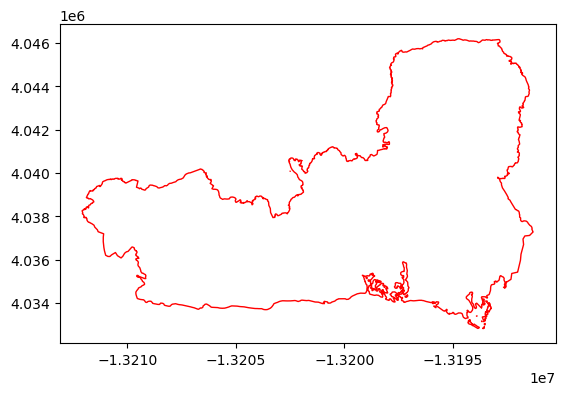

In [33]:
fig, ax = plt.subplots()
palis_fire.plot(ax=ax, color = 'none', edgecolor = 'red')
palis_eji.plot(ax=ax, color='blue')
plt.show()

In [ ]:
# Plot Eaton with EJI


In [34]:
palis_perimeter.crs = eji.crs

In [56]:
palis_perimeter.crs == eji.crs

True

In [35]:
palis_eji = gpd.sjoin(palis_perimeter, eji)

<Axes: >

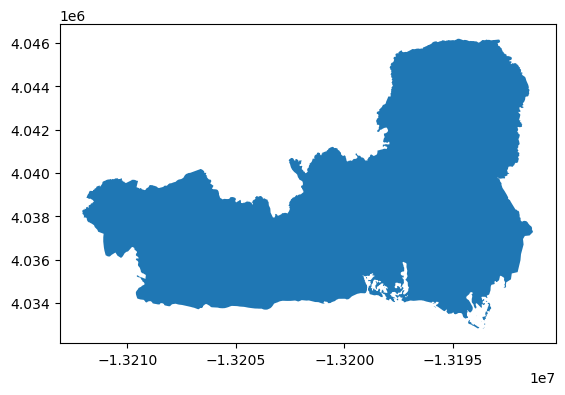

In [36]:
palis_perimeter.plot()

<Axes: >

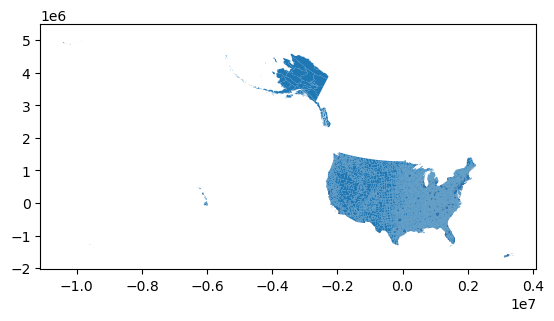

In [37]:
eji.plot()

In [54]:
eji_palis_clipped = gpd.clip(eji, palis_perimeter)
eji_palis_clipped.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,...,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry


In [50]:
eji_eaton_clipped = gpd.clip(eaton_perimeter, eji)

,OBJECTID,type,Shape__Are,Shape__Len,geometry


/tmp/ipykernel_2950347/972738820.py:4: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  eji_eaton_clipped.plot(ax = ax, color = 'blue')


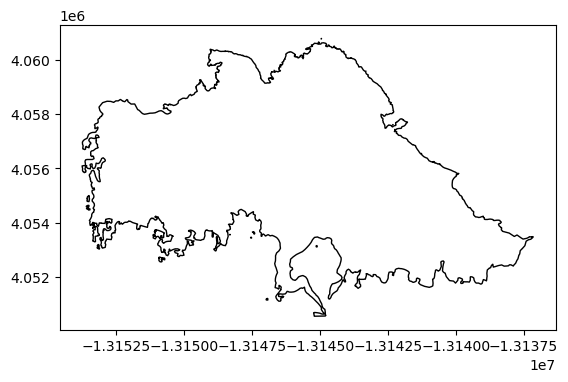

In [52]:
fig, ax = plt.subplots()
ax.axis('off')
eaton_perimeter.plot(ax = ax, color = 'none',
                    edgecolor = 'red')
eji_eaton_clipped.plot(ax = ax, color = 'blue')
plt.show()
plt.tight_layout()